In [1]:
# import EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load dataset
ulam_df = pd.read_csv('./data_collection/ulam.csv', sep=',', index_col=0)
print('ulam_df.shape: {}'.format(ulam_df.shape) )

ulam_df.shape: (91, 2)


In [3]:
# check dataframe info
ulam_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ulam_titles  91 non-null     object
 1   ingredients  91 non-null     object
dtypes: object(2)
memory usage: 2.1+ KB


In [4]:
# check few random sample
ulam_df.sample(30)

,ulam_titles,ingredients
20,Pochero,"['OR\nBEEF', 'OR\nPORK', 'CHICKEN', 'TOMATO', ..."
85,Kare-kare,"['OR\nPORK', 'OR\nOXTAIL', 'OR\nCHICKEN', 'GOA..."
72,Tocino,"['PORK', 'SUGAR', 'SALT', 'RICE WINE', 'SOY SA..."
24,Tortang talong,"['EGGPLANT', 'EGGS']"
71,Lechon kawali,"['PORK', 'SALT', 'PEPPERCORNS']"
73,Turon,"['PLANTAIN', 'DURIAN', 'SUGAR']"
61,Dinuguan,"['PORK', 'VINEGAR', 'FISH SAUCE', 'ONION', 'GI..."
29,Espasol,"['RICE FLOUR', 'COCONUT', 'COCONUT MILK']"
22,Paksiw,"['BANGUS', 'VINEGAR', 'GINGER', 'GARLIC', 'ONI..."
69,Taho,"['TOFU', 'TAPIOCA', 'SUGAR']"


In [5]:
# compute basic ulam_titles descriptive stats
ulam_df['ulam_titles'].describe()

count             91
unique            91
top       Champorado
freq               1
Name: ulam_titles, dtype: object

In [6]:
# remove the "OR\n" to some ingredients
def remove_or_slash_n(ingredients):
    ingredients = ingredients.lstrip('[').rstrip(']').replace('\'', '').split(',')
    ingredients_cleaned = [ingredient.split(r'OR\n')[-1].lower().strip() for ingredient in list(ingredients)]
    return '|'.join(ingredients_cleaned)
ulam_df['ingredients'] = ulam_df['ingredients'].apply(remove_or_slash_n)

In [7]:
# check few random sample
ulam_df.sample(30)

,ulam_titles,ingredients
64,Atchara,papaya|carrot|onion|daikon radish|bell pepper|...
17,Giniling,beef|bell pepper|olive oil|garlic|onion|olives...
57,Tinolang manok,chicken|papaya|tlaola serrano chili pepper|gin...
73,Turon,plantain|durian|sugar
15,Kalamay,coconut milk|rice flour|sugar
70,Tinola,chicken|seafood|fish sauce|papaya|ginger|garli...
13,Maja blanca,coconut milk|cornstarch|corn|cheese|latik
35,Buko Pie,coconut|condensed milk|cream|sugar
27,Palitaw,rice flour|coconut|sugar
55,Menudo Filipino,pork|offal|hot dog|tomato sauce|potatoes|carro...


In [8]:
# check Lumpia and Pancit ingredients
ulam_df[(ulam_df.ulam_titles == 'Pancit') | (ulam_df.ulam_titles == 'Lumpia')]

,ulam_titles,ingredients
86,Lumpia,lumpiang shanghai
90,Pancit,pancit canton|pancit bihon|pancit palabok|panc...


In [9]:
# drop Lumpia and Pancit records
ulam_df.drop([86, 90], inplace=True)
ulam_df.tail(10)

,ulam_titles,ingredients
79,Torta,eggs|beef|onion|potatoes|eggplant|tomato
80,Leche Flan,eggs|milk|condensed milk|sugar|vanilla
81,Tapa (Philippines),beef|lime|soy sauce|garlic|sugar
82,Crispy Pata,pork|bay leaf|peppercorns|salt
83,Sinigang,tamarind|guava|radish|tomato|eggplant|water sp...
84,Kaldereta,beef|goat|tomato sauce|potatoes|carrot|onion|b...
85,Kare-kare,pork|oxtail|chicken|goat|peanut butter|peanuts...
87,Adobo,chicken|pork|squid|vinegar|soy sauce|bay leaf|...
88,Sisig,pork|offal|vinegar|onion|hot peppers|soy sauce...
89,Lechon,pork|onion|garlic|lemongrass|bay leaf|salt|bla...


In [10]:
from sklearn.feature_extraction.text import CountVectorizer 
import pprint

cv = CountVectorizer(analyzer=lambda text: text.split('|')).fit(ulam_df['ingredients'])
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
pprint.pprint(cv.get_feature_names())

Vocabulary size: 122
['annatto powder',
 'baking powder',
 'banana ketchup',
 'bananas',
 'bangus',
 'bay leaf',
 'beef',
 'bell pepper',
 'bitter melon',
 'black pepper',
 'bok choy',
 'bone marrow',
 'brown sugar',
 'butter',
 'cabbage',
 'capers',
 'carrot',
 'cashews',
 'cassava',
 'cayenne pepper',
 'cheese',
 'chicharrón',
 'chicken',
 'chickpeas',
 'citrus fruit',
 'cocoa beans',
 'coconut',
 'coconut cream',
 'coconut milk',
 'condensed milk',
 'coriander',
 'corn',
 'cornstarch',
 'cream',
 'cream of tartar',
 'cumin',
 'daikon radish',
 'durian',
 'eggplant',
 'eggs',
 'fish sauce',
 'flour',
 'garlic',
 'gelatin',
 'ginger',
 'goat',
 'green beans',
 'guava',
 'hot dog',
 'hot peppers',
 'ice cream',
 'ketchup',
 'latik',
 'leche flan',
 'leek',
 'lemon',
 'lemongrass',
 'lime',
 'long beans',
 'lye water',
 'milk',
 'mung bean',
 'noodles',
 'offal',
 'oil',
 'okra',
 'olive oil',
 'olives',
 'onion',
 'orange juice',
 'oxtail',
 'papaya',
 'peanut butter',
 'peanuts',
 'pe

In [19]:
bow = cv.transform(ulam_df['ingredients'])
bow_df = pd.DataFrame(bow.toarray(), columns=cv.get_feature_names(), index=ulam_df['ulam_titles'])
bow_df.sample(10)

,annatto powder,baking powder,banana ketchup,bananas,bangus,bay leaf,beef,bell pepper,bitter melon,black pepper,...,tocino,tofu,tomato,tomato sauce,tuna,vanilla,vinegar,water spinach,white wine vinegar,yam
ulam_titles,,,,,,,,,,,,,,,,,,,,,
Sisig,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
Tapsilog,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Afritada,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
Arroz caldo,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Mechado,0,0,0,0,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
Bulalô,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lugaw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sinigang na hipon,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
Tocino,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


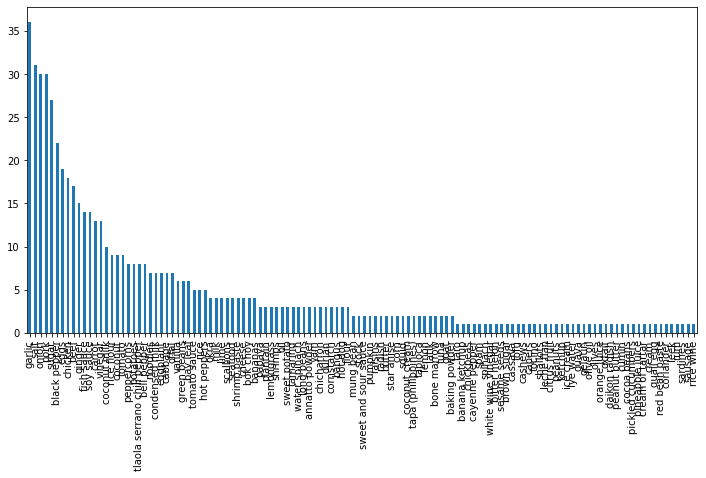

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))
bow_df.sum().sort_values(ascending=False).plot(kind='bar', ax=ax)
ax.tick_params(axis="x", rotation=90)